In [56]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns
from scipy.stats import f_oneway 

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [3]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [18]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


Обработка данных и подготовка выборок

In [11]:
grass_group = pokemon[((pokemon['Class 1'] == 'Grass') & ~(pokemon['Class 2'] == 'Rock')) | (~(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] == 'Grass'))]
rock_group = pokemon[((pokemon['Class 1'] == 'Rock') & ~(pokemon['Class 2'] == 'Grass')) | (~(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] == 'Rock'))]

In [16]:
print('Количество покемонов типа Grass -', len(grass_group))

Количество покемонов типа Grass - 93


In [17]:
print('Количество покемонов типа Rock -', len(rock_group))

Количество покемонов типа Rock - 56


Распределение выборок

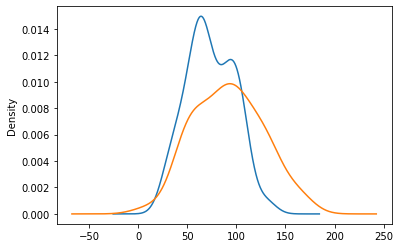

In [20]:
grass_group['Attack'].plot(kind='density')
rock_group['Attack'].plot(kind='density');

Покемонов в обеих группах разное количество, предполагается нормальность распределения атаки, выборки независимы. Следовательно можно использовать t-критерий Стьюдента.

**H0:** средняя атака у покемонов типов Grass и Rock не отличается  
**H1:** средняя атака у покемонов типов Grass выше, чем у покемонов типа Rock 

$\alpha = 0.05$

In [37]:
_, p = stats.ttest_ind(grass_group['Attack'], rock_group['Attack'], alternative='greater')

alpha = 0.05  # Уровень значимости
print('p-value =', p) 

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')


p-value = 0.9998633330927005
Одинаковое распределение (не отвергаем H0)


**Вывод:** средняя оценка обычной атаки у покемонов типа Grass не выше, чем у покемонов типа Rock

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

Обработка данных и подготовка выборок

In [24]:
water_group = pokemon[((pokemon['Class 1'] == 'Water') & ~(pokemon['Class 2'] == 'Normal')) | (~(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] == 'Water'))]
normal_group = pokemon[((pokemon['Class 1'] == 'Normal') & ~(pokemon['Class 2'] == 'Water')) | (~(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] == 'Normal'))]

In [25]:
print('Количество покемонов типа Water -', len(water_group))

Количество покемонов типа Water - 125


In [26]:
print('Количество покемонов типа Normal -', len(normal_group))

Количество покемонов типа Normal - 101


Распределение выборок

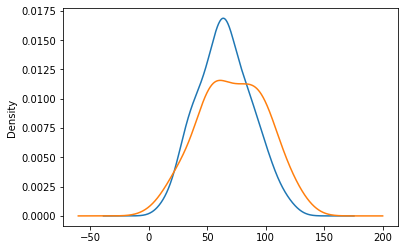

In [28]:
water_group['Speed'].plot(kind='density')
normal_group['Speed'].plot(kind='density');

Покемонов в обеих группах разное количество, предполагается нормальность распределения скорости, выборки независимы. Следовательно можно использовать t-критерий Стьюдента.

**H0:** средняя скорость у покемонов типов Water и Normal не отличается  
**H1:** средняя скорость у покемонов типов Water выше, чем у покемонов типа Normal 

$\alpha = 0.05$

In [38]:
_, p = stats.ttest_ind(water_group['Speed'], normal_group['Speed'], alternative='greater')

alpha = 0.05  # Уровень значимости
print('p-value =', p)  

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

p-value = 0.9837232322430448
Одинаковое распределение (не отвергаем H0)


**Вывод:** средняя скорость у покемонов типа Water не выше, чем у покемонов типа Normal

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [39]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

Обработка данных и подготовка выборок

In [40]:
treatment_group = pokemon[pokemon['Name'].isin(treathed_pokemon)]
control_group = pokemon[~pokemon['Name'].isin(treathed_pokemon)]

In [42]:
print('Количество покемонов, принимавших сыворотку -', len(treatment_group))

Количество покемонов, принимавших сыворотку - 4


In [43]:
print('Количество покемонов, не принимавших сыворотку -', len(control_group))

Количество покемонов, не принимавших сыворотку - 796


Распределение выборок

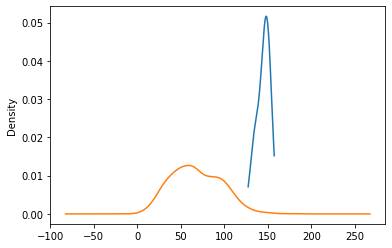

In [44]:
treatment_group['Speed'].plot(kind='density')
control_group['Speed'].plot(kind='density');

Покемонов в обеих группах разное количество, предполагается нормальность распределения скорости, выборки независимы. Следовательно можно использовать t-критерий Стьюдента. Несмотря на то, что выборка из покемонов с сывороткой маленькая, можно использовать критерий, предполагая, что выборка взята из нормального распределения.

**H0:** средняя скорость у покемонов, которым была введена сыворотка, не отличается от средней скорости покемонов, не принимавших сыворотку    
**H1:** средняя скорость у покемонов, которым была введена сыворотка, выше, чем у покемонов, не принимавших сыворотку

$\alpha = 0.05$

In [45]:
_, p = stats.ttest_ind(treatment_group['Speed'], control_group['Speed'], alternative='greater')

alpha = 0.05  # Уровень значимости
print('p-value =', p) 

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

p-value = 4.75755058815393e-08
Разное распределение (отклоняем H0)


**Вывод:** средняя скорость у покемонов, принимавших сыворотку выше, чем у покемонов, не принимавших ее. Однако я считаю, что данный эксперимент мог показать некорректные результаты. Во-первых исследуемые покемоны довольно высокого класса и даже без сыворотки могут иметь скорость выше, чем у остальных. Во-вторых исследование лучше было бы проводить по-другому. Например взять тех же покемонов 'Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny', разделить их на две группы, одним дать сыворотку, другим нет, и уже потом сравнивать скорости.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

Обработка данных, вычисление параметров, по которым будем сравнивать покемонов

In [47]:
pokemon['main features sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon['main features mult'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,main features sum,main features mult
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [48]:
legendary_group_sum = pokemon[pokemon.Legendary]['main features sum']
other_group_sum = pokemon[~pokemon.Legendary]['main features sum']

legendary_group_mult = pokemon[pokemon.Legendary]['main features mult']
other_group_mult = pokemon[~pokemon.Legendary]['main features mult']

In [49]:
print('Количество легендарных покемонов -', len(legendary_group_sum))

Количество легендарных покемонов - 65


In [50]:
print('Количество не легендарных покемонов -', len(other_group_sum))

Количество не легендарных покемонов - 735


Распределение сумм

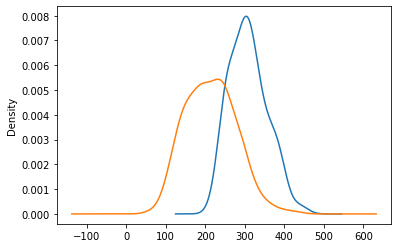

In [51]:
legendary_group_sum.plot(kind='density')
other_group_sum.plot(kind='density');

Распределение произведений

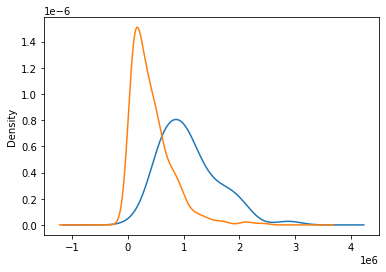

In [52]:
legendary_group_mult.plot(kind='density')
other_group_mult.plot(kind='density');

Покемонов в обеих группах разное количество, предполагается нормальность распределения ключевых арактеристик, выборки независимы. Следовательно можно использовать t-критерий Стьюдента.

**H0:** характеристики у легендарных и обычных покемонов не отличаются    
**H1:** характеристики у легендарных покемонов лучше, чем у обычных

$\alpha = 0.05$

In [53]:
_, p = stats.ttest_ind(legendary_group_sum, other_group_sum, alternative='greater')

alpha = 0.05  # Уровень значимости
print('p-value =', p)

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

p-value = 3.9854711028610435e-29
Разное распределение (отклоняем H0)


In [54]:
_, p = stats.ttest_ind(legendary_group_mult, other_group_mult, alternative='greater')

alpha = 0.05  # Уровень значимости
print('p-value =', p) 

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

p-value = 9.96332154421141e-37
Разное распределение (отклоняем H0)


**Вывод:** По обоим тестам суммы и произведения основных характеристик у легендарных покемонов выше, чем у обычных

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [55]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

Подготовка данных по каждому классу покемонов

In [63]:
rock_group = pokemon[((pokemon['Class 1'] == 'Rock') & ~(pokemon['Class 2'].isin(['Ground','Steel','Ice']))) | (~(pokemon['Class 1'].isin(['Ground','Steel','Ice'])) & (pokemon['Class 2'] == 'Rock'))]['Defense']
ground_group = pokemon[((pokemon['Class 1'] == 'Ground') & ~(pokemon['Class 2'].isin(['Rock','Steel','Ice']))) | (~(pokemon['Class 1'].isin(['Rock','Steel','Ice'])) & (pokemon['Class 2'] == 'Ground'))]['Defense']
steel_group = pokemon[((pokemon['Class 1'] == 'Steel') & ~(pokemon['Class 2'].isin(['Ground','Rock','Ice']))) | (~(pokemon['Class 1'].isin(['Ground','Rock','Ice'])) & (pokemon['Class 2'] == 'Steel'))]['Defense']
ice_group = pokemon[((pokemon['Class 1'] == 'Ice') & ~(pokemon['Class 2'].isin(['Ground','Steel','Rock']))) | (~(pokemon['Class 1'].isin(['Ground','Steel','Rock'])) & (pokemon['Class 2'] == 'Ice'))]['Defense']

Визуализация распределений

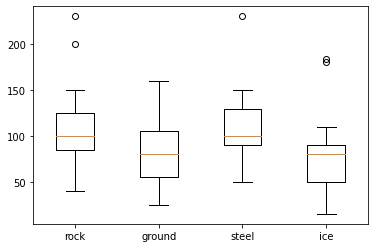

In [73]:
plt.boxplot([rock_group, ground_group, steel_group, ice_group], labels=['rock', 'ground', 'steel', 'ice']);

По графикам есть различие в распределениях показателя защиты у разных типов покемонов

Так как сравнивается несколько групп покемонов по одному показателю, который считается распределенным нормально, можно использовать дисперсионный анализ выборок.

**H0:** характеристики защиты для покемонов типа 'Rock', 'Ground','Steel','Ice' имеют одинаковое распределение    
**H1:** хотя бы одна пара покемонов из типов 'Rock', 'Ground','Steel','Ice' имеет разные по распределению характеристики защиты

$\alpha = 0.05$

In [74]:
alpha = 0.05  # Уровень значимости
f, p = f_oneway(rock_group, ground_group, steel_group, ice_group)

print(f, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

8.820416931465497 1.885892116821956e-05
Разное распределение (отклоняем H0)


**Вывод:** распределение характеристик защиты у покемонов с типами 'Rock', 'Ground','Steel','Ice' различается Значительно. Следовательно эти классы отличаются по уровню защиты.